# EDA - Economicron Project 
## Examining the impact of the pandemic and global government policy on democracy, economy, and satisfaction. 

A work in progress through Winter 2022. 



# Table of Contents

* [Exploratory Data Analysis for Data Until October 19, 2020](#1)
    * [Compare Stringency Index between March 30 and October 19](#2)
    * [The Plight of Numeric vs. Categorical Data](#3)
    * [Cases and Deaths Over Time](#4)
    * [Relationship between Categorical Variables](#5)
* [Exploratory Data Analysis for Data Through Jan 9, 2022](#chapter3)
    * [Isolate the Dataset to 177 Countries](#section_3_1)
    * [Cases and Deaths Over Time](#6)
    * [Updated Categorical Correlation Matrices](#7)
* [Democracy Data Set](#c3)

## Import Data

Now that we have created and combined datasets in the `Data Prep - Economicron` file, let's do some EDA and make some vizualizations. 

### Transform Data into Categorical Variables

In [6]:
import pandas as pd
import numpy as np

In [7]:
final_data = pd.read_csv('final_dataset.csv')
final_data.head(3)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
1,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
2,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0


A lot of this data is meant to be categorical. We'll transform the data to reflect this organization. 

In [76]:
final_data_categorical = final_data
final_data_categorical.head(3)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
1,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
2,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0


In [77]:
final_data_categorical.iloc[:, np.r_[9:27, 28:33, 35:41]] = final_data_categorical.iloc[:, np.r_[9:27, 28:33, 35:41]].astype('category')

In [78]:
final_data_categorical.head(3)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
1,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
2,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0


In [79]:
final_data_categorical.dtypes

CODE                                       object
COUNTRY                                    object
DATE                                       object
HDI                                       float64
TC                                        float64
TD                                        float64
STI                                       float64
POP                                       float64
GDPCAP                                    float64
C1_School closing                        category
C1_Flag                                  category
C2_Workplace closing                     category
C2_Flag                                  category
C3_Cancel public events                  category
C3_Flag                                  category
C4_Restrictions on gatherings            category
C4_Flag                                  category
C5_Close public transport                category
C5_Flag                                  category
C6_Stay at home requirements             category


Now the categories are properly designated. 

## EDA for Data Until October 19, 2020 <a class="anchor" id="1"></a>

Let's go ahead and explore the final dataset we prepared within the last category. 

In [170]:
final_data_categorical.describe()

,HDI,TC,TD,STI,POP,GDPCAP,E3_Fiscal measures,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,total_cases,total_deaths,population,death_percentage,case_percentage
count,77483.000000,80082.000000,80082.000000,80082.000000,80082.000000,80082.000000,6.286700e+04,6.276300e+04,6.322200e+04,7.392200e+04,73838.000000,79617.000000,79617.000000,79614.000000,79615.000000,79610.000000,7.423400e+04,65350.000000,8.008200e+04,8.008200e+04,80082.000000
mean,0.780956,8.718480,5.592729,3.489613,17.674394,9.490285,1.649261e+08,1.068919e+07,4.627621e+05,6.010425e+04,2368.596563,55.638464,62.699647,50.449403,51.359476,44.080361,7.252602e+05,29610.485830,2.754187e+08,1.204516e-04,0.003435
std,0.146869,4.622314,4.213771,1.442838,2.446644,2.021338,1.114211e+10,1.108752e+09,3.799242e+07,3.332590e+05,10918.680875,26.643439,27.271513,22.232137,22.437856,30.996698,1.686190e+06,56196.245045,4.479433e+08,2.036118e-04,0.006167
min,0.000000,0.000000,0.000000,0.000000,10.432291,0.000000,-1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.393800e+04,0.000000e+00,0.000000
25%,0.750000,5.468060,1.386294,3.506458,16.107075,9.322664,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+02,2.000000,41.670000,53.570000,42.710000,43.450000,12.500000,7.150000e+02,52.000000,9.890400e+06,2.630990e-07,0.000026
50%,0.761000,9.487138,5.609472,4.206631,17.898266,9.636177,0.000000e+00,0.000000e+00,0.000000e+00,2.027000e+03,49.000000,61.110000,70.950000,57.550000,58.330000,50.000000,2.432000e+04,1580.000000,5.930869e+07,6.187320e-06,0.000301
75%,0.924000,11.734658,8.908559,4.341855,19.617637,10.724075,0.000000e+00,0.000000e+00,0.000000e+00,2.791600e+04,668.000000,76.390000,82.140000,66.150000,66.960000,62.500000,1.683310e+05,16792.000000,3.310026e+08,1.647795e-04,0.003861
max,0.953000,15.914092,12.299900,4.605170,21.087439,11.669379,1.960000e+12,2.420000e+11,7.863850e+09,8.228963e+06,220611.000000,100.000000,100.000000,89.840000,91.960000,100.000000,8.154595e+06,219674.000000,1.439324e+09,1.237551e-03,0.045782


### Compare Stringency Index between March 30 and October 19 <a class="anchor" id="2"></a>
Let's compare the difference in the stringency of government policy between when the pandemic started ramping up and the last day of our dataset.

In [7]:
import datetime

In [16]:
october_19_2020_cat = final_data_categorical.loc[(final_data_categorical['DATE'] ==  datetime.date(2020, 10, 19))]
october_19_2020_cat.head(6)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
292,AFG,Afghanistan,2020-10-19,0.498,10.601622,7.307873,0.0,17.477233,7.497754,1.0,...,27.38,21.88,25.00,0.0,Asia,40200.0,1492.0,38928341,0.000038,0.001033
517,ALB,Albania,2020-10-19,0.785,9.744199,6.111467,0.0,14.872537,9.376146,2.0,...,60.71,59.90,61.31,50.0,Europe,17055.0,451.0,2877800,0.000157,0.005926
810,DZA,Algeria,2020-10-19,0.754,10.904156,7.526179,0.0,17.596309,9.540639,2.0,...,83.33,65.10,67.26,50.0,Africa,54402.0,1856.0,43851043,0.000042,0.001241
1036,AND,Andorra,2020-10-19,0.858,8.124743,4.077537,0.0,11.254996,0.000000,2.0,...,61.90,61.98,56.55,100.0,Europe,3377.0,59.0,77265,0.000764,0.043707
1248,AGO,Angola,2020-10-19,0.581,8.917579,5.484797,0.0,17.307957,8.668969,2.0,...,83.33,50.52,57.74,0.0,Africa,7462.0,241.0,32866268,0.000007,0.000227
1500,ARG,Argentina,2020-10-19,0.825,13.805124,10.176069,0.0,17.626514,9.848710,3.0,...,84.52,75.26,75.30,75.0,South America,989667.0,26267.0,45195777,0.000581,0.021897


In [17]:
march_30_2020_cat = final_data_categorical.loc[(final_data_categorical['DATE'] == datetime.date(2020, 3, 30))]
march_30_2020_cat.head(6)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
89,AFG,Afghanistan,2020-03-30,0.498,4.736198,1.386294,4.213460,17.477233,7.497754,3.0,...,80.95,48.44,55.36,0.0,Asia,114.0,4.0,38928341,1.027530e-07,2.928460e-06
314,ALB,Albania,2020-03-30,0.785,5.356586,2.302585,4.433907,14.872537,9.376146,3.0,...,91.67,65.10,69.05,37.5,Europe,212.0,10.0,2877800,3.474880e-06,7.366740e-05
607,DZA,Algeria,2020-03-30,0.754,6.236370,3.433987,4.460953,17.596309,9.540639,3.0,...,88.10,55.99,63.99,0.0,Africa,511.0,31.0,43851043,7.069390e-07,1.165310e-05
833,AND,Andorra,2020-03-30,0.858,5.811141,1.791759,3.874321,11.254996,0.000000,3.0,...,69.05,47.92,47.62,50.0,Europe,334.0,6.0,77265,7.765480e-05,4.322785e-03
1045,AGO,Angola,2020-03-30,0.581,1.945910,0.693147,4.507998,17.307957,8.668969,3.0,...,95.24,53.12,60.71,0.0,Africa,7.0,2.0,32866268,6.085270e-08,2.129840e-07
1297,ARG,Argentina,2020-03-30,0.825,6.709304,2.995732,4.605170,17.626514,9.848710,3.0,...,100.00,80.21,80.95,75.0,South America,820.0,20.0,45195777,4.425190e-07,1.814330e-05


In [18]:
# combine the two into one dataset
march_v_october_cat = pd.merge(march_30_2020_cat, october_19_2020_cat, left_on=['COUNTRY'], right_on=['COUNTRY'])
march_v_october_cat.head(3)

,CODE_x,COUNTRY,DATE_x,HDI_x,TC_x,TD_x,STI_x,POP_x,GDPCAP_x,C1_School closing_x,...,StringencyLegacyIndex_y,GovernmentResponseIndex_y,ContainmentHealthIndex_y,EconomicSupportIndex_y,Continent_y,total_cases_y,total_deaths_y,population_y,death_percentage_y,case_percentage_y
0,AFG,Afghanistan,2020-03-30,0.498,4.736198,1.386294,4.213460,17.477233,7.497754,3.0,...,27.38,21.88,25.00,0.0,Asia,40200.0,1492.0,38928341,0.000038,0.001033
1,ALB,Albania,2020-03-30,0.785,5.356586,2.302585,4.433907,14.872537,9.376146,3.0,...,60.71,59.90,61.31,50.0,Europe,17055.0,451.0,2877800,0.000157,0.005926
2,DZA,Algeria,2020-03-30,0.754,6.236370,3.433987,4.460953,17.596309,9.540639,3.0,...,83.33,65.10,67.26,50.0,Africa,54402.0,1856.0,43851043,0.000042,0.001241


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [60]:
%matplotlib inline 
sns.set_style("whitegrid")

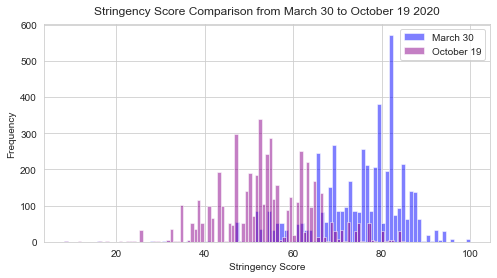

In [61]:
plt.figure(figsize=(8, 4))
plt.hist(march_v_october_cat.StringencyIndex_x, bins = 100, alpha = .5, color = 'blue', label = 'March 30');
plt.hist(march_v_october_cat.StringencyIndex_y, bins = 100, alpha = .5, color = 'darkmagenta', label = 'October 19');
plt.xlabel('Stringency Score')
plt.ylabel('Frequency')
plt.legend(loc='upper right');
plt.title('Stringency Score Comparison from March 30 to October 19 2020', pad = 10)
plt.show()

In [ ]:
cases_by_continent = px.line(grouped_continent, x = 'DATE', y = 'total_cases', color = 'Continent',
                             title = "Cases through October 2020", 
                             color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                             labels = {
                                 'total_cases': "Total Cases",
                                 'DATE': 'Date'
                             },
                             template = 'simple_white')

cases_by_continent.show()

## The Plight of Numeric vs. Categorical Data <a class="anchor" id="3"></a>

Most of the variables in this dataset are categorical and thus, cannot be analyzed using numeric data methods. 

I have included these charts below as an example of what happens when you try to use numeric methods on categorical data. 

In [7]:
import plotly.express as px
import seaborn as sns

In [58]:
final_data.head(3)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
1,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
2,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0


In [59]:
# convert the column to dates
final_data['DATE'] = pd.to_datetime(final_data.DATE)

In [13]:
# display all columns in a df
pd.options.display.max_columns = None

In [60]:
# creating non-categorical versions of the dates we used in the last section
october_19_2020 = final_data.loc[(final_data['DATE'] == '2020-01-01')]
october_19_2020.head(6)

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings,H6_Flag,H7_Vaccination policy,H7_Flag,H8_Protection of elderly people,H8_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
518,DZA,Algeria,2020-01-01,0.754,0.0,0.0,0.0,17.596309,9.540639,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Africa,NaN,NaN,43851043,0.0,0.0
1717,AUS,Australia,2020-01-01,0.939,0.0,0.0,0.0,17.054184,10.706581,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Oceania,NaN,NaN,25499881,0.0,0.0
2010,AUT,Austria,2020-01-01,0.908,0.0,0.0,0.0,16.013446,10.724075,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Europe,NaN,NaN,9006400,0.0,0.0
2303,AZE,Azerbaijan,2020-01-01,0.757,0.0,0.0,0.0,16.131917,9.670762,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Europe,NaN,NaN,10139175,0.0,0.0
2812,BHR,Bahrain,2020-01-01,0.846,0.0,0.0,0.0,14.347070,10.675693,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,Asia,NaN,NaN,1701583,0.0,0.0


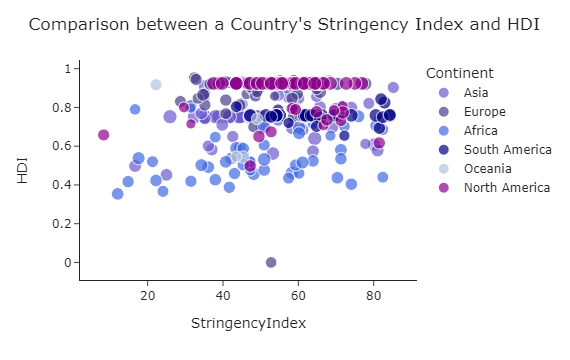

In [226]:
figure1 = px.scatter(october_19_2020, x = "StringencyIndex", y = "HDI", size = "POP",
          hover_name = "COUNTRY", color = "Continent", color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'], template = "simple_white",
          size_max = 10)
figure1.update_layout(height = 200,
                 title_text = "Comparison between a Country's Stringency Index and HDI"
                 )
figure1.show()

Horrifying. Never again. 

On the other hand, it is very tempting to make a correlation matrix without the coded categorical variables. Look how nice: 


In [103]:
import matplotlib.pyplot as plt

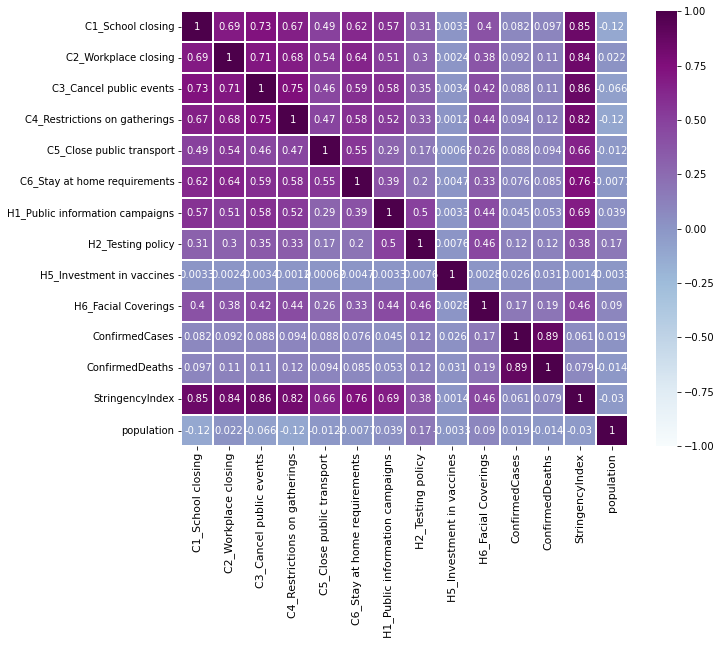

In [106]:
cor = final_data[['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'ConfirmedDeaths', 
            'StringencyIndex', 'population']].corr()

sns.heatmap(cor, annot=True, linewidths = .2, cmap = 'BuPu', vmin = -1, vmax = 1)

fig2 = plt.gcf()
fig2.set_size_inches(10, 8)
plt.xticks(fontsize = 11)
plt.show()


Unfortunately, this is not statistically accurate. See what happens when we try to code this with the categorically coded dataset. 

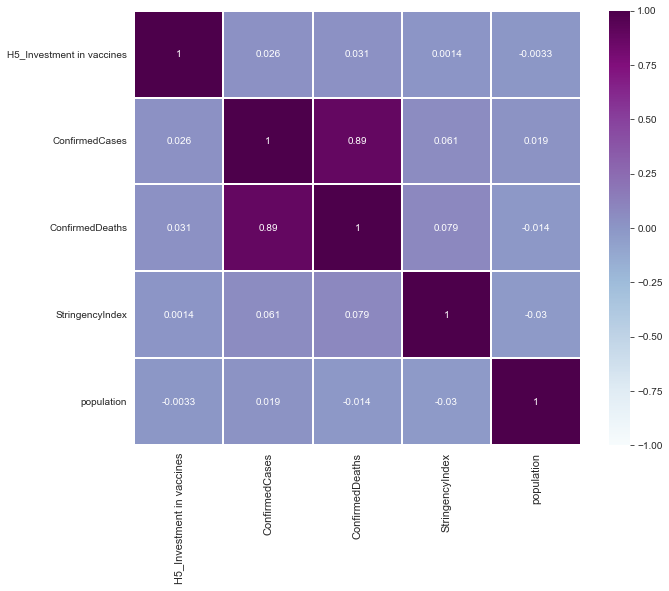

In [231]:
cor2 = final_data_categorical[['C1_School closing', 'C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'H7_Vaccination policy', 'ConfirmedCases', 'ConfirmedDeaths', 
            'StringencyIndex', 'population']].corr()

sns.heatmap(cor2, annot=True, linewidths = .2, cmap = 'BuPu', vmin = -1, vmax = 1)
fig2 = plt.gcf()
fig2.set_size_inches(10, 8)
plt.xticks(fontsize = 11)
plt.show()


Significantly less useful. 

## Cases and Deaths Over Time <a class="anchor" id="4"></a>

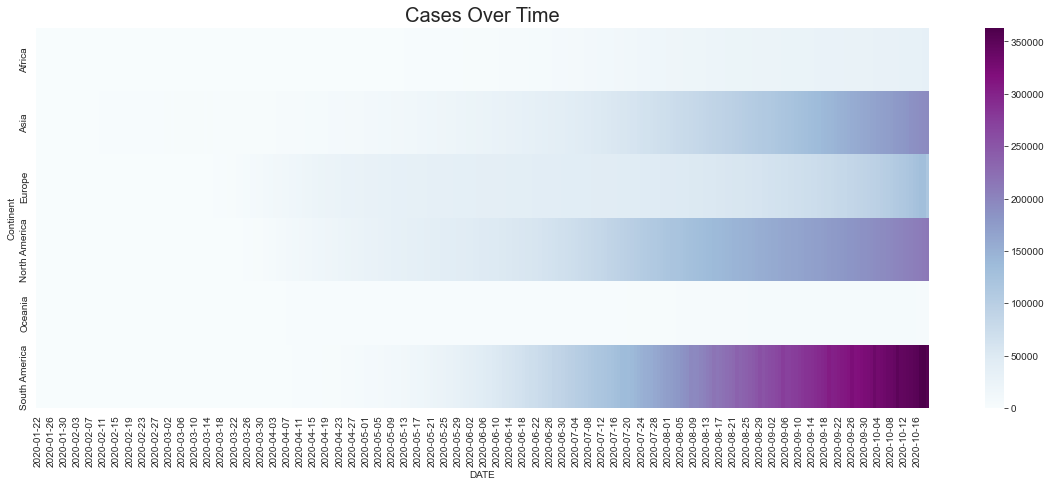

In [232]:
df_cases = pd.pivot_table(data = final_data, 
                    index = 'Continent',
                    values = 'ConfirmedCases',
                    columns = 'DATE')

plt.figure(figsize = (20, 7))
sns.heatmap(df_cases, cmap = 'BuPu');
plt.title('Cases Over Time', size = 20);
plt.show()

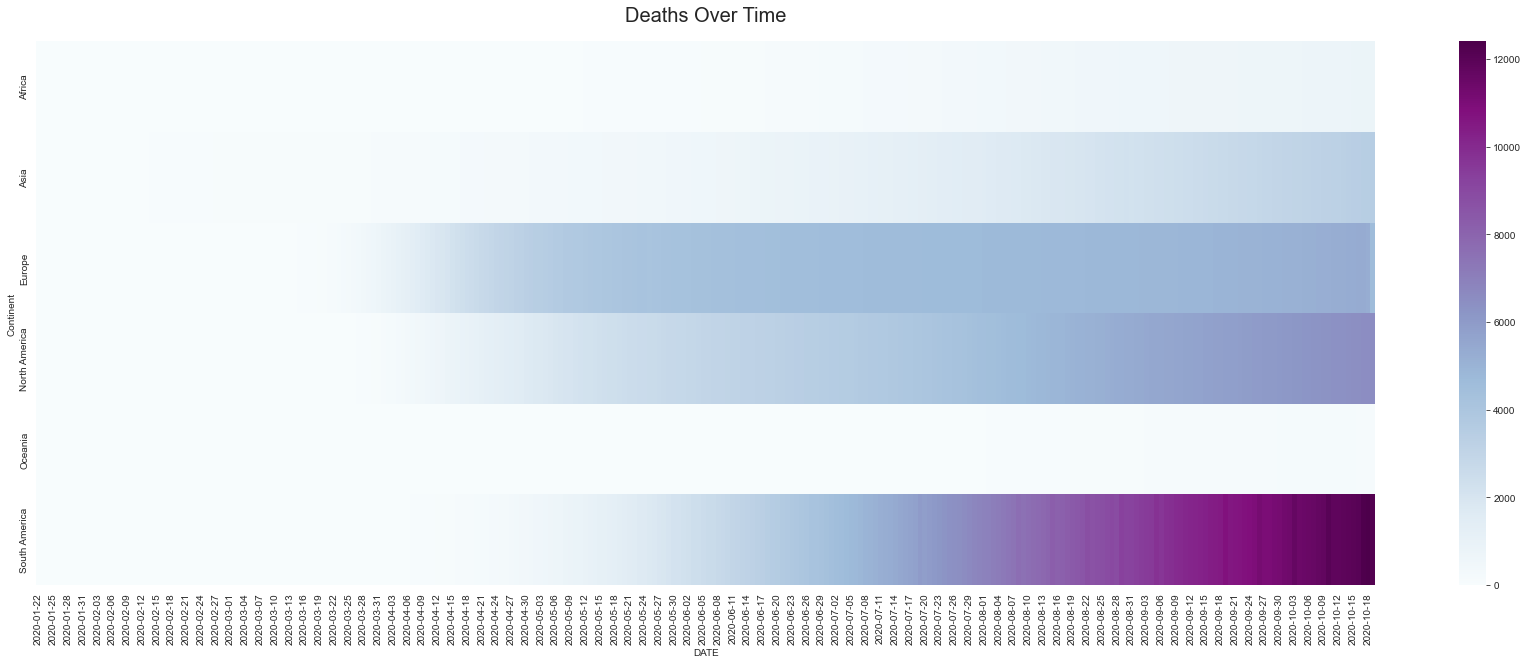

In [22]:
df_deaths = pd.pivot_table(data = final_data, 
                    index = 'Continent',
                    values = 'ConfirmedDeaths',
                    columns = 'DATE')

plt.figure(figsize = (30, 10))
sns.heatmap(df_deaths, cmap = 'BuPu');
plt.title('Deaths Over Time', size = 20, pad = 20);
plt.show()

For this next plot, we'll have to group the data by continent before plotting. 

In [234]:
final_data.groupby(['Continent'])['total_cases'].sum()

Continent
Africa           1.341768e+08
Asia             1.636481e+09
Europe           6.679630e+08
North America    3.920895e+10
Oceania          3.467274e+06
South America    1.218793e+10
Name: total_cases, dtype: float64

Now let's group by continent within the df

In [10]:
grouped_continent = final_data.groupby(['Continent', 'DATE']).agg({'total_cases': ['sum'], 'total_deaths': ['sum'], 'StringencyIndex': ['mean']})
grouped_continent.columns = ['total_cases', 'total_deaths', 'StringencyIndex']
grouped_continent = grouped_continent.reset_index()
grouped_continent.info()
grouped_continent.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        1758 non-null   object 
 1   DATE             1758 non-null   object 
 2   total_cases      1758 non-null   float64
 3   total_deaths     1758 non-null   float64
 4   StringencyIndex  1758 non-null   float64
dtypes: float64(3), object(2)
memory usage: 68.8+ KB


,Continent,DATE,total_cases,total_deaths,StringencyIndex
0,Africa,2020-01-01,0.0,0.0,0.0
1,Africa,2020-01-02,0.0,0.0,0.0
2,Africa,2020-01-03,0.0,0.0,0.0
3,Africa,2020-01-04,0.0,0.0,0.0
4,Africa,2020-01-05,0.0,0.0,0.0
5,Africa,2020-01-06,0.0,0.0,0.0
6,Africa,2020-01-07,0.0,0.0,0.0
7,Africa,2020-01-08,0.0,0.0,0.0
8,Africa,2020-01-09,0.0,0.0,0.0
9,Africa,2020-01-10,0.0,0.0,0.0


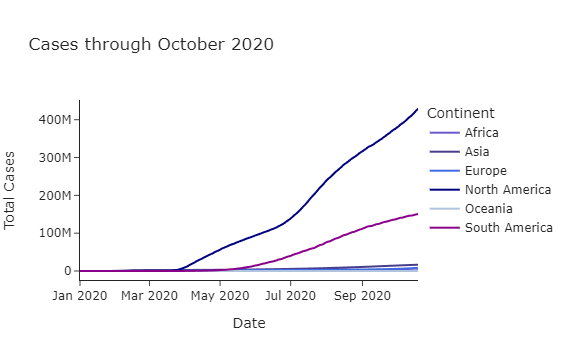

In [70]:
cases_by_continent = px.line(grouped_continent, x = 'DATE', y = 'total_cases', color = 'Continent',
                             title = "Cases through October 2020", 
                             color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                             labels = {
                                 'total_cases': "Total Cases",
                                 'DATE': 'Date'
                             },
                             template = 'simple_white')

cases_by_continent.show()

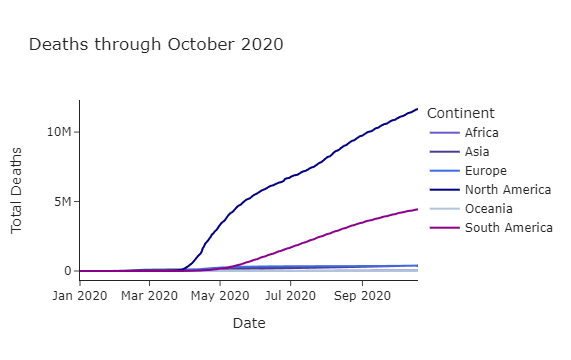

In [69]:
deaths_by_continent = px.line(grouped_continent, x = 'DATE', y = 'total_deaths', color = 'Continent',
                              title = "Deaths through October 2020", 
                              color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                              labels = {
                                 'total_deaths': "Total Deaths",
                                 'DATE': 'Date'
                             },
                              template = 'simple_white')

deaths_by_continent.show()

In [13]:
import seaborn as sns

In [23]:
final_data.head()

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
1,AFG,Afghanistan,2020-01-02,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
2,AFG,Afghanistan,2020-01-03,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
3,AFG,Afghanistan,2020-01-04,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0
4,AFG,Afghanistan,2020-01-05,0.498,0.0,0.0,0.0,17.477233,7.497754,0.0,...,0.0,0.0,0.0,0.0,Asia,0.0,0.0,38928341,0.0,0.0


## Relationship between Categorical Variables <a class="anchor" id="5"></a>

The `Dython` package allows you to create a correlation matrix with categorical variables using:
- Pearson's R for continuous-continuous cases
- Correlation Ratio for categorical-continuous cases 
- Cramer's V or Theil's U for categorical-categorical cases

Documentation: http://shakedzy.xyz/dython/modules/nominal/

### Correlation Matrices by Continent

In [63]:
final_data_categorical

,CODE,COUNTRY,DATE,HDI,TC,TD,STI,POP,GDPCAP,C1_School closing,...,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,total_cases,total_deaths,population,death_percentage,case_percentage
0,AFG,Afghanistan,2020-01-01,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.0,...,0.00,0.0,0.00,0.0,Africa,0.0,0.0,38928341,0.000000,0.000000
1,AFG,Afghanistan,2020-01-02,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.0,...,0.00,0.0,0.00,0.0,Africa,0.0,0.0,38928341,0.000000,0.000000
2,AFG,Afghanistan,2020-01-03,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.0,...,0.00,0.0,0.00,0.0,Africa,0.0,0.0,38928341,0.000000,0.000000
3,AFG,Afghanistan,2020-01-04,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.0,...,0.00,0.0,0.00,0.0,Africa,0.0,0.0,38928341,0.000000,0.000000
4,AFG,Afghanistan,2020-01-05,0.498,0.000000,0.000000,0.000000,17.477233,7.497754,0.0,...,0.00,0.0,0.00,0.0,Africa,0.0,0.0,38928341,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80077,ZWE,Zimbabwe,2020-10-15,0.535,8.994048,5.442418,4.341855,16.514381,7.549491,2.0,...,77.38,50.0,53.57,25.0,Africa,8055.0,231.0,14862927,0.000016,0.000542
80078,ZWE,Zimbabwe,2020-10-16,0.535,8.996528,5.442418,4.341855,16.514381,7.549491,2.0,...,77.38,50.0,53.57,25.0,Africa,8075.0,231.0,14862927,0.000016,0.000543
80079,ZWE,Zimbabwe,2020-10-17,0.535,8.999496,5.442418,4.341855,16.514381,7.549491,2.0,...,77.38,50.0,53.57,25.0,Africa,8099.0,231.0,14862927,0.000016,0.000545
80080,ZWE,Zimbabwe,2020-10-18,0.535,9.000853,5.442418,4.341855,16.514381,7.549491,2.0,...,77.38,50.0,53.57,25.0,Africa,8110.0,231.0,14862927,0.000016,0.000546


### Grouping the Data by Continent and Making Correlation Matrices for Each Continent

In [98]:
Africa = final_data_categorical.loc[final_data_categorical['Continent'] == 'Africa']

In [83]:
Asia = final_data_categorical.loc[final_data_categorical['Continent'] == 'Asia']

In [84]:
Europe = final_data_categorical.loc[final_data_categorical['Continent'] == 'Europe']

In [86]:
North_America = final_data_categorical.loc[final_data_categorical['Continent'] == 'North America']

In [87]:
Oceania = final_data_categorical.loc[final_data_categorical['Continent'] == 'Oceania']

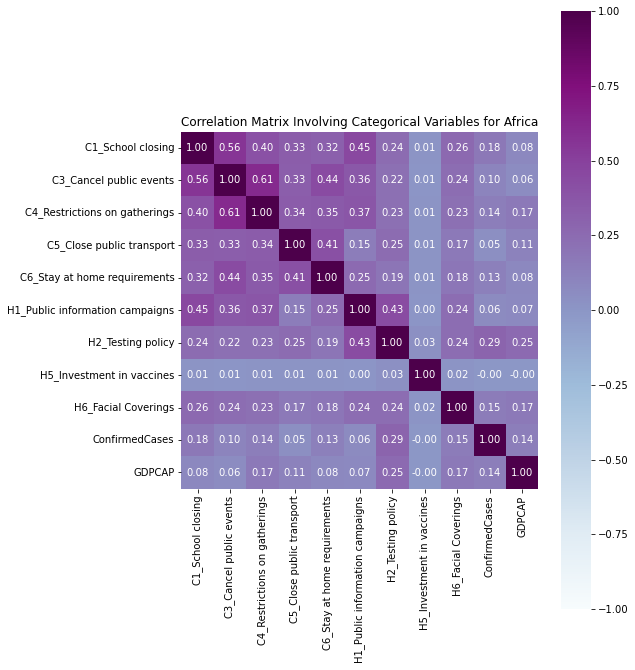

{'corr':                                  C1_School closing  C3_Cancel public events  \
 C1_School closing                         1.000000                 0.557670   
 C3_Cancel public events                   0.557670                 1.000000   
 C4_Restrictions on gatherings             0.404021                 0.614690   
 C5_Close public transport                 0.334598                 0.327548   
 C6_Stay at home requirements              0.316357                 0.444062   
 H1_Public information campaigns           0.454273                 0.360187   
 H2_Testing policy                         0.244904                 0.222693   
 H5_Investment in vaccines                 0.009178                 0.006076   
 H6_Facial Coverings                       0.262307                 0.238149   
 ConfirmedCases                            0.178369                 0.101712   
 GDPCAP                                    0.083852                 0.060270   
 
                              

In [100]:
associations(Africa[['C1_School closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'GDPCAP']], figsize = (8, 11), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables for Africa')

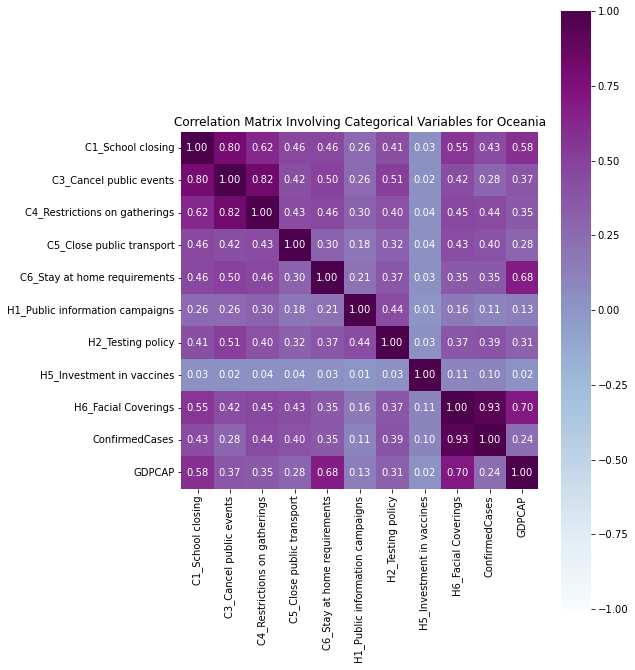

{'corr':                                  C1_School closing  C3_Cancel public events  \
 C1_School closing                         1.000000                 0.798660   
 C3_Cancel public events                   0.798660                 1.000000   
 C4_Restrictions on gatherings             0.620350                 0.822254   
 C5_Close public transport                 0.456332                 0.416300   
 C6_Stay at home requirements              0.456608                 0.499130   
 H1_Public information campaigns           0.256674                 0.264824   
 H2_Testing policy                         0.414940                 0.512532   
 H5_Investment in vaccines                 0.034604                 0.023561   
 H6_Facial Coverings                       0.554679                 0.423467   
 ConfirmedCases                            0.429773                 0.281560   
 GDPCAP                                    0.580798                 0.369503   
 
                              

In [96]:
associations(Oceania[['C1_School closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'GDPCAP']], figsize = (8, 11), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables for Oceania')

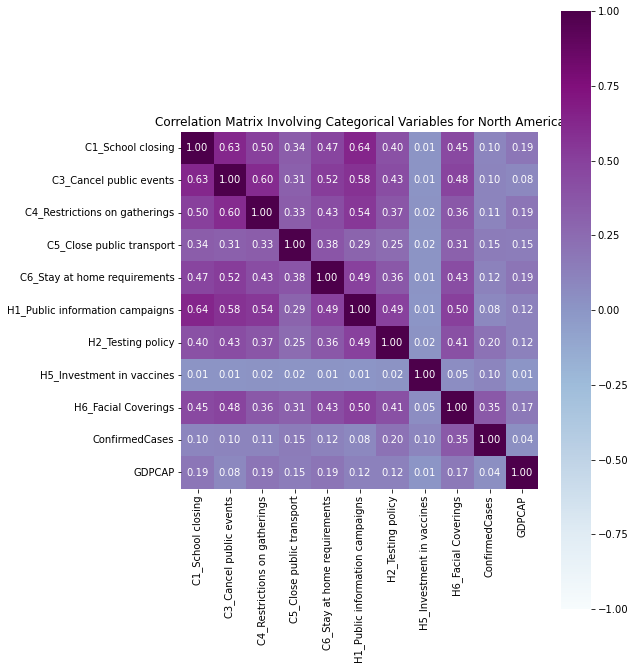

{'corr':                                  C1_School closing  C3_Cancel public events  \
 C1_School closing                         1.000000                 0.632346   
 C3_Cancel public events                   0.632346                 1.000000   
 C4_Restrictions on gatherings             0.502773                 0.603020   
 C5_Close public transport                 0.335327                 0.312509   
 C6_Stay at home requirements              0.472417                 0.522580   
 H1_Public information campaigns           0.638313                 0.575856   
 H2_Testing policy                         0.398833                 0.425453   
 H5_Investment in vaccines                 0.014058                 0.012416   
 H6_Facial Coverings                       0.451372                 0.480401   
 ConfirmedCases                            0.097382                 0.104714   
 GDPCAP                                    0.185396                 0.082458   
 
                              

In [107]:
associations(North_America[['C1_School closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'GDPCAP']], figsize = (8, 11), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables for North America')

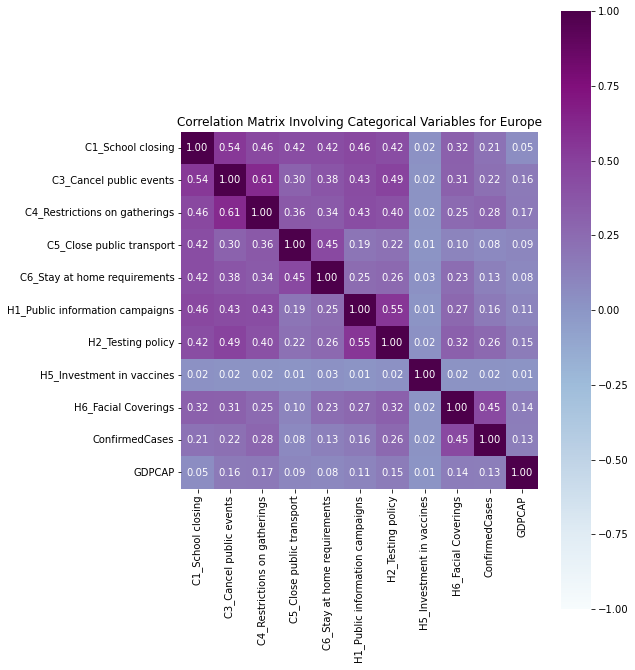

{'corr':                                  C1_School closing  C3_Cancel public events  \
 C1_School closing                         1.000000                 0.539746   
 C3_Cancel public events                   0.539746                 1.000000   
 C4_Restrictions on gatherings             0.460770                 0.612754   
 C5_Close public transport                 0.422241                 0.301389   
 C6_Stay at home requirements              0.423087                 0.380942   
 H1_Public information campaigns           0.455446                 0.434572   
 H2_Testing policy                         0.422219                 0.487333   
 H5_Investment in vaccines                 0.024170                 0.018592   
 H6_Facial Coverings                       0.318452                 0.306884   
 ConfirmedCases                            0.208434                 0.221589   
 GDPCAP                                    0.053599                 0.156774   
 
                              

In [93]:
associations(Europe[['C1_School closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'GDPCAP']], figsize = (8, 11), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables for Europe')

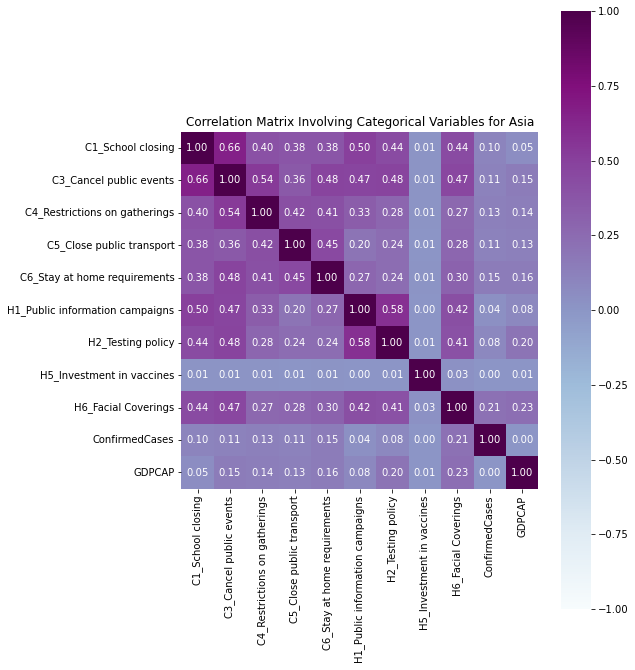

{'corr':                                  C1_School closing  C3_Cancel public events  \
 C1_School closing                         1.000000                 0.658288   
 C3_Cancel public events                   0.658288                 1.000000   
 C4_Restrictions on gatherings             0.403534                 0.537530   
 C5_Close public transport                 0.377612                 0.357895   
 C6_Stay at home requirements              0.381114                 0.481228   
 H1_Public information campaigns           0.503099                 0.469627   
 H2_Testing policy                         0.438128                 0.480737   
 H5_Investment in vaccines                 0.010317                 0.010572   
 H6_Facial Coverings                       0.444830                 0.466814   
 ConfirmedCases                            0.103945                 0.110630   
 GDPCAP                                    0.051332                 0.149950   
 
                              

In [94]:
associations(Asia[['C1_School closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'GDPCAP']], figsize = (8, 11), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables for Asia')

### General Correlation Matrix - All Continents

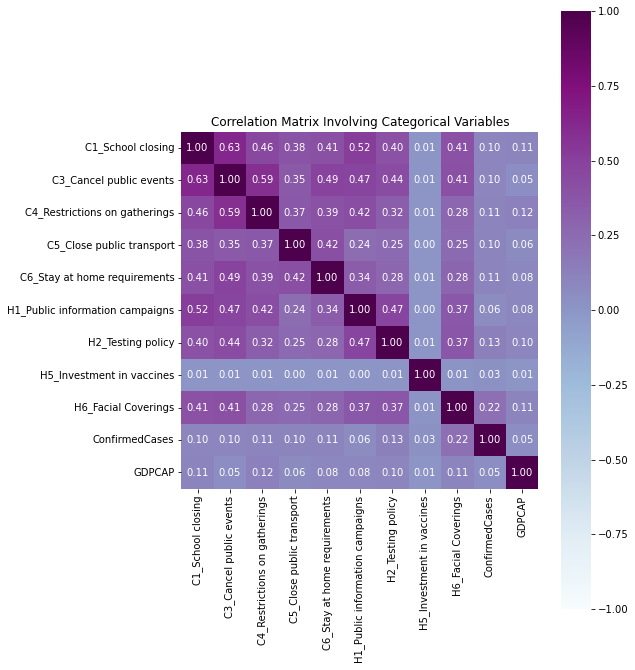

{'corr':                                  C1_School closing  C3_Cancel public events  \
 C1_School closing                         1.000000                 0.629445   
 C3_Cancel public events                   0.629445                 1.000000   
 C4_Restrictions on gatherings             0.458607                 0.592215   
 C5_Close public transport                 0.383359                 0.353206   
 C6_Stay at home requirements              0.413840                 0.488786   
 H1_Public information campaigns           0.516663                 0.472290   
 H2_Testing policy                         0.399061                 0.436516   
 H5_Investment in vaccines                 0.006253                 0.005203   
 H6_Facial Coverings                       0.405029                 0.414050   
 ConfirmedCases                            0.096141                 0.101134   
 GDPCAP                                    0.105419                 0.054375   
 
                              

In [95]:
from dython.nominal import associations
associations(final_data_categorical[['C1_School closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
            'H1_Public information campaigns', 'H2_Testing policy', 'H5_Investment in vaccines', 'H6_Facial Coverings', 'ConfirmedCases', 'GDPCAP']], figsize = (8, 11), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables')

## Exploratory Data Analysis for Data Through Jan 9, 2022  <a class="anchor" id="chapter_3"></a>

While the Kaggle dataset provides us with more information to look at, the range of dates is quite limited. Therefore, let's do an EDA with just the `democracy_df` dataset. 

### Isolate the Dataset to 177 Countries <a class="anchor" id="section_3_1"></a>

In [4]:
import pandas as pd

In [5]:
democracy_df = pd.read_csv('OxCGRT_latest.csv')

In [8]:
to_jan_2022 = democracy_df[democracy_df['CountryName'].isin(final_data.COUNTRY.unique())]

In [9]:
updated_continent_list = pd.read_csv('updated_countries.csv')

In [10]:
to_jan_2022 = pd.merge(to_jan_2022, updated_continent_list, left_on = 'CountryName', right_on = 'Country')
to_jan_2022.head(3)

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,H8_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent,Country
0,Aruba,1/1/2020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America,Aruba
1,Aruba,1/2/2020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America,Aruba
2,Aruba,1/3/2020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America,Aruba


In [11]:
to_jan_2022 = to_jan_2022.drop(['Country'], axis = 1)
to_jan_2022.head(3)

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,H8_Protection of elderly people,H8_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent
0,Aruba,1/1/2020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America
1,Aruba,1/2/2020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America
2,Aruba,1/3/2020,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America


In [12]:
# convert Date column to dates
to_jan_2022['Date'] = pd.to_datetime(to_jan_2022.Date)
to_jan_2022['Date'] = to_jan_2022['Date'].dt.date
to_jan_2022.head(3)

,CountryName,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,...,H8_Protection of elderly people,H8_Flag,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyLegacyIndex,GovernmentResponseIndex,ContainmentHealthIndex,EconomicSupportIndex,Continent
0,Aruba,2020-01-01,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America
1,Aruba,2020-01-02,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America
2,Aruba,2020-01-03,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,South America


In [13]:
# define categorical variables
to_jan_2022.iloc[:, np.r_[2:20, 21:26, 28:33]] = to_jan_2022.iloc[:, np.r_[2:20, 21:26, 28:33]].astype('category')

In [14]:
to_jan_2022.dtypes

CountryName                                object
Date                                       object
C1_School closing                        category
C1_Flag                                  category
C2_Workplace closing                     category
C2_Flag                                  category
C3_Cancel public events                  category
C3_Flag                                  category
C4_Restrictions on gatherings            category
C4_Flag                                  category
C5_Close public transport                category
C5_Flag                                  category
C6_Stay at home requirements             category
C6_Flag                                  category
C7_Restrictions on internal movement     category
C7_Flag                                  category
C8_International travel controls         category
E1_Income support                        category
E1_Flag                                  category
E2_Debt/contract relief                  category


In [15]:
# group by continent again 
grouped_continent_2022 = to_jan_2022.groupby(['Continent', 'Date']).agg({'ConfirmedCases': ['sum'], 'ConfirmedDeaths': ['sum'], 'StringencyIndex': ['mean']})
grouped_continent_2022.columns = ['ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex']
grouped_continent_2022 = grouped_continent_2022.reset_index()
grouped_continent_2022.info()
grouped_continent_2022.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Continent        4560 non-null   object 
 1   Date             4560 non-null   object 
 2   ConfirmedCases   4560 non-null   float64
 3   ConfirmedDeaths  4560 non-null   float64
 4   StringencyIndex  4556 non-null   float64
dtypes: float64(3), object(2)
memory usage: 178.2+ KB


,Continent,Date,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Africa,2020-01-01,0.0,0.0,0.113469
1,Africa,2020-01-02,0.0,0.0,0.113469
2,Africa,2020-01-03,0.0,0.0,0.113469
3,Africa,2020-01-04,0.0,0.0,0.113469
4,Africa,2020-01-05,0.0,0.0,0.113469
5,Africa,2020-01-06,0.0,0.0,0.113469
6,Africa,2020-01-07,0.0,0.0,0.113469
7,Africa,2020-01-08,0.0,0.0,0.113469
8,Africa,2020-01-09,0.0,0.0,0.113469
9,Africa,2020-01-10,0.0,0.0,0.113469


In [109]:
to_jan_2022.to_csv('to_january.csv', index=False)

### Cases and Deaths Over Time <a class="anchor" id="6"></a>

In [13]:
import plotly.express as px
import seaborn as sns

In [16]:
grouped_continent_2022.head()

,Continent,Date,ConfirmedCases,ConfirmedDeaths,StringencyIndex
0,Africa,2020-01-01,0.0,0.0,0.113469
1,Africa,2020-01-02,0.0,0.0,0.113469
2,Africa,2020-01-03,0.0,0.0,0.113469
3,Africa,2020-01-04,0.0,0.0,0.113469
4,Africa,2020-01-05,0.0,0.0,0.113469


In [17]:
grouped_continent_2022 = grouped_continent_2022.drop('StringencyIndex', 1)

C:\Users\Julia\AppData\Local\Temp/ipykernel_2792/2136813906.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  grouped_continent_2022 = grouped_continent_2022.drop('StringencyIndex', 1)


In [18]:
grouped_continent_2022.head()

,Continent,Date,ConfirmedCases,ConfirmedDeaths
0,Africa,2020-01-01,0.0,0.0
1,Africa,2020-01-02,0.0,0.0
2,Africa,2020-01-03,0.0,0.0
3,Africa,2020-01-04,0.0,0.0
4,Africa,2020-01-05,0.0,0.0


In [19]:
# create a new column with yesterday's case and death value
grouped_continent_2022['prev_day_case'] = grouped_continent_2022.groupby('Continent')['ConfirmedCases'].shift()
grouped_continent_2022['prev_day_death'] = grouped_continent_2022.groupby('Continent')['ConfirmedDeaths'].shift()

# insert new col with difference between yesterday adn the day before that 
grouped_continent_2022.loc[:, 'CaseDiff'] = grouped_continent_2022.groupby('Continent')['prev_day_case'].diff()
grouped_continent_2022.loc[:, 'DeathDiff'] = grouped_continent_2022.groupby('Continent')['prev_day_death'].diff()

grouped_continent_2022

,Continent,Date,ConfirmedCases,ConfirmedDeaths,prev_day_case,prev_day_death,CaseDiff,DeathDiff
0,Africa,2020-01-01,0.0,0.0,NaN,NaN,NaN,NaN
1,Africa,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN
2,Africa,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
3,Africa,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
4,Africa,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4555,South America,2022-01-25,70816779.0,1831234.0,70205476.0,1829418.0,944049.0,12541.0
4556,South America,2022-01-26,71441694.0,1833271.0,70816779.0,1831234.0,611303.0,1816.0
4557,South America,2022-01-27,71096562.0,1810698.0,71441694.0,1833271.0,624915.0,2037.0
4558,South America,2022-01-28,23809161.0,602550.0,71096562.0,1810698.0,-345132.0,-22573.0


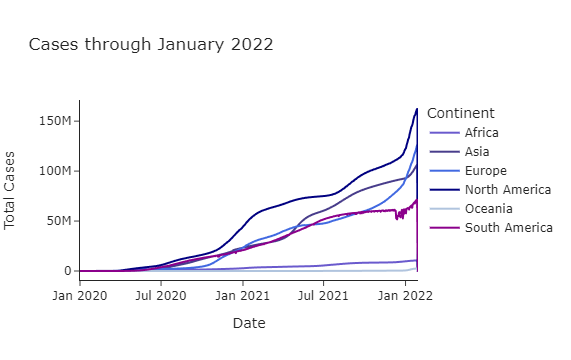

'https://plotly.com/~jcraciun/1/'

In [25]:
cases_by_continent = px.line(grouped_continent_2022, x = 'Date', y = 'ConfirmedCases', color = 'Continent',
                             title = "Cases through January 2022", 
                             color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                             labels = {
                                 'ConfirmedCases': "Total Cases",
                                 'Date': 'Date'
                             },
                             template = 'simple_white')

cases_by_continent.show()

# export for Medium article 
py.plot(cases_by_continent, filename="Cases by Continent through January 2022", auto_open = True)

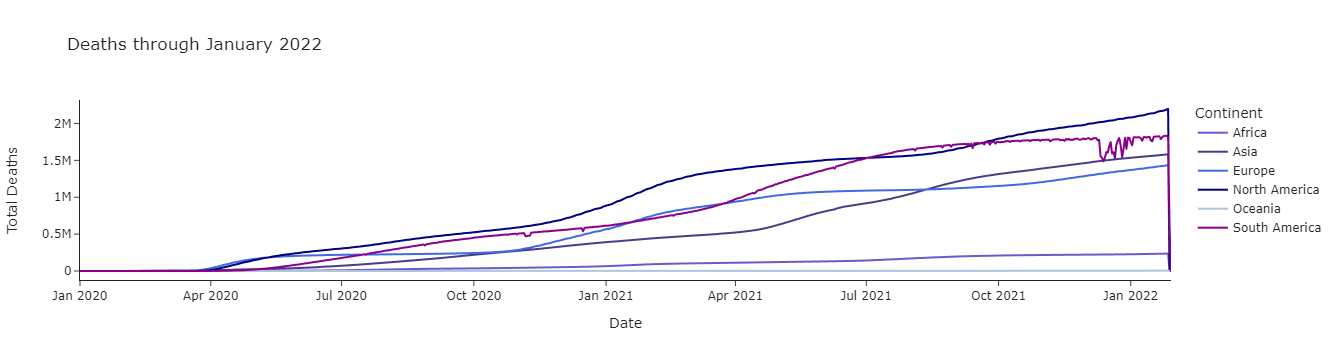

'https://plotly.com/~jcraciun/3/'

In [26]:
deaths_by_continent = px.line(grouped_continent_2022, x = 'Date', y = 'ConfirmedDeaths', color = 'Continent',
                             title = "Deaths through January 2022", 
                             color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                             labels = {
                                 'ConfirmedDeaths': "Total Deaths",
                                 'Date': 'Date'
                             },
                             template = 'simple_white')

deaths_by_continent.show()

# export for Medium article 
py.plot(deaths_by_continent, filename="Deaths by Continent through January 2022", auto_open = True)

### Updated Categorical Correlation Matrices <a class="anchor" id="7"></a>

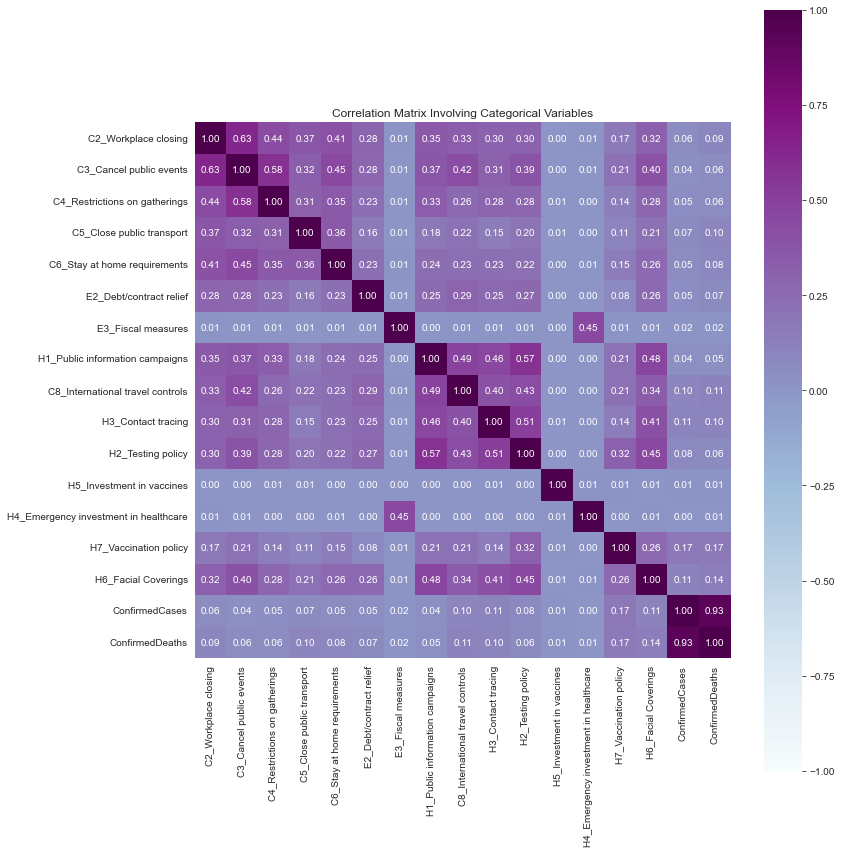

{'corr':                                        C2_Workplace closing  \
 C2_Workplace closing                               1.000000   
 C3_Cancel public events                            0.631686   
 C4_Restrictions on gatherings                      0.437050   
 C5_Close public transport                          0.370521   
 C6_Stay at home requirements                       0.405332   
 E2_Debt/contract relief                            0.283416   
 E3_Fiscal measures                                 0.009853   
 H1_Public information campaigns                    0.346184   
 C8_International travel controls                   0.331396   
 H3_Contact tracing                                 0.298695   
 H2_Testing policy                                  0.304064   
 H5_Investment in vaccines                          0.003510   
 H4_Emergency investment in healthcare              0.011208   
 H7_Vaccination policy                              0.171598   
 H6_Facial Coverings            

In [58]:
from dython.nominal import associations

associations(to_jan_2022[['C2_Workplace closing', 'C3_Cancel public events', 'C4_Restrictions on gatherings', 'C5_Close public transport', 'C6_Stay at home requirements', 
                        'E2_Debt/contract relief', 'E3_Fiscal measures', 'H1_Public information campaigns', 'C8_International travel controls', 'H3_Contact tracing', 
                        'H2_Testing policy', 'H5_Investment in vaccines', 'H4_Emergency investment in healthcare', 'H7_Vaccination policy', 
                        'H6_Facial Coverings', 'ConfirmedCases', 'ConfirmedDeaths']], figsize = (12, 14), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables')


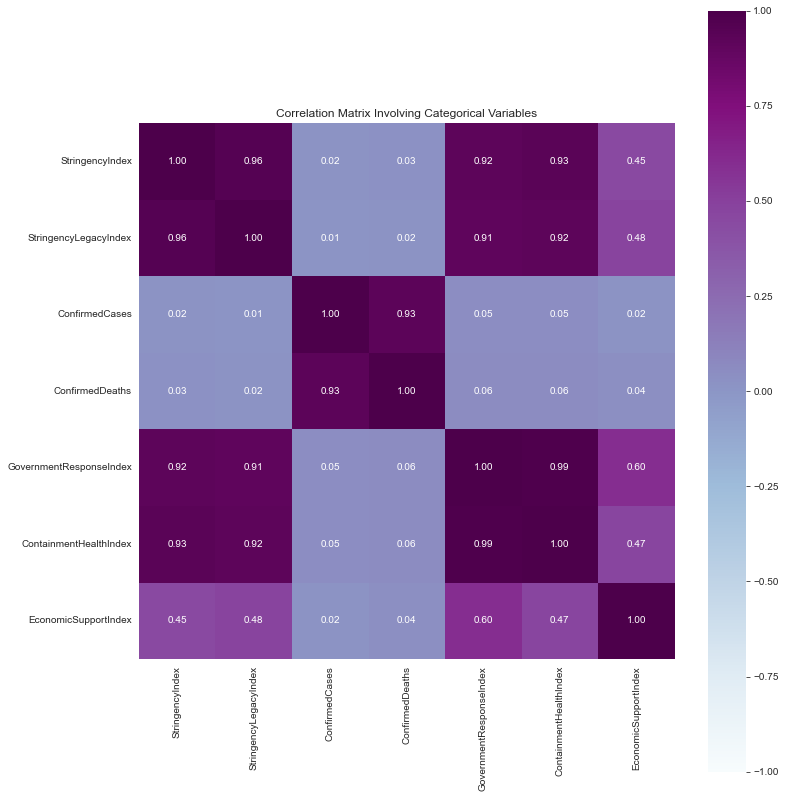

{'corr':                          StringencyIndex  StringencyLegacyIndex  \
 StringencyIndex                 1.000000               0.959300   
 StringencyLegacyIndex           0.959300               1.000000   
 ConfirmedCases                  0.022089               0.014452   
 ConfirmedDeaths                 0.031245               0.021775   
 GovernmentResponseIndex         0.918332               0.907945   
 ContainmentHealthIndex          0.930604               0.918859   
 EconomicSupportIndex            0.451043               0.479162   
 
                          ConfirmedCases  ConfirmedDeaths  \
 StringencyIndex                0.022089         0.031245   
 StringencyLegacyIndex          0.014452         0.021775   
 ConfirmedCases                 1.000000         0.927592   
 ConfirmedDeaths                0.927592         1.000000   
 GovernmentResponseIndex        0.048891         0.056481   
 ContainmentHealthIndex         0.052913         0.056514   
 EconomicSupportInd

In [59]:
from dython.nominal import associations

associations(to_jan_2022[['StringencyIndex','StringencyLegacyIndex', 'ConfirmedCases', 'ConfirmedDeaths', 'GovernmentResponseIndex', 'ContainmentHealthIndex', 
                         'EconomicSupportIndex']], 
             figsize = (12, 14), cmap = 'BuPu', title = 'Correlation Matrix Involving Categorical Variables')


## Democracy Dataset <a class="anchor" id="c3"></a>

In [29]:
# update: new dataset with 2022 values released in march
vdem = pd.read_csv('democracy_dataset_2022.csv')
vdem.head()

,country_name,year,historical_date,v2x_libdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_cspart,v2x_partipdem,v2xdd_dd,Continent
0,Mexico,1789,1789-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
1,Mexico,1790,1790-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
2,Mexico,1791,1791-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
3,Mexico,1792,1792-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
4,Mexico,1793,1793-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America


In [28]:
updated_vdem['historical_date'] = pd.to_datetime(updated_vdem['historical_date'])
updated_vdem.head()

,country_name,year,historical_date,v2x_libdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_cspart,v2x_partipdem,v2xdd_dd,Continent
0,Mexico,1789,1789-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
1,Mexico,1790,1790-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
2,Mexico,1791,1791-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
3,Mexico,1792,1792-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
4,Mexico,1793,1793-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America


In [40]:
vdem = pd.read_csv('democracy_final.csv')

In [41]:
vdem.head(3)

,country_name,year,historical_date,v2x_libdem,v2x_polyarchy,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_elecoff,v2xcl_rol,v2x_cspart,v2xeg_eqprotec,v2xeg_eqaccess,v2xeg_eqdr,v2x_partipdem,v2xdd_dd,v2xel_regelec,v2x_egal,Continent,GDP,Unemployment_Rate
0,Mexico,1980,12/31/1980,0.135,0.302,0.160,0.533,0.568,1.0,0.146,1.0,0.528,0.263,0.383,0.403,0.305,0.172,0.0,0.944,0.376,North America,9.5,NaN
1,Mexico,1981,12/31/1981,0.136,0.307,0.163,0.533,0.598,1.0,0.146,1.0,0.534,0.263,0.394,0.403,0.305,0.174,0.0,0.944,0.375,North America,8.5,NaN
2,Mexico,1982,12/31/1982,0.140,0.316,0.165,0.533,0.597,1.0,0.175,1.0,0.534,0.263,0.394,0.403,0.305,0.177,0.0,0.944,0.375,North America,-0.5,NaN


In [31]:
vdem_simple = vdem[['country_name', 'year', 'historical_date', 'v2x_libdem', 
                    'v2x_egaldem', 'v2x_freexp_altinf', 'v2x_frassoc_thick', 'v2x_suffr', 'v2xel_frefair', 
                    'v2x_cspart', 'v2x_partipdem', 'v2xdd_dd', 'Continent']]


In [32]:
vdem_simple.head(3)

,country_name,year,historical_date,v2x_libdem,v2x_egaldem,v2x_freexp_altinf,v2x_frassoc_thick,v2x_suffr,v2xel_frefair,v2x_cspart,v2x_partipdem,v2xdd_dd,Continent
0,Mexico,1789,1789-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
1,Mexico,1790,1790-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America
2,Mexico,1791,1791-12-31,0.04,NaN,0.156,0.041,0.0,0.0,0.037,0.007,NaN,North America


In [43]:
vdem_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country_name       6389 non-null   object 
 1   year               6389 non-null   int64  
 2   historical_date    6389 non-null   object 
 3   v2x_libdem         6350 non-null   float64
 4   v2x_polyarchy      6373 non-null   float64
 5   v2x_egaldem        6373 non-null   float64
 6   v2x_freexp_altinf  6389 non-null   float64
 7   v2x_frassoc_thick  6389 non-null   float64
 8   v2x_suffr          6389 non-null   float64
 9   v2xel_frefair      6375 non-null   float64
 10  v2x_elecoff        6387 non-null   float64
 11  v2xcl_rol          6389 non-null   float64
 12  v2x_cspart         6389 non-null   float64
 13  v2xeg_eqprotec     6389 non-null   float64
 14  v2xeg_eqaccess     6389 non-null   float64
 15  v2xeg_eqdr         6389 non-null   float64
 16  v2x_partipdem      6373 

### Group Data By Continent

In [33]:
grouped_vdem = vdem_simple.groupby(['Continent', 'year']).agg({'v2x_egaldem': ['mean']})
grouped_vdem.columns = ['v2x_egaldem']
grouped_vdem = grouped_vdem.reset_index()
grouped_vdem.info()
grouped_vdem.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Continent    1398 non-null   object 
 1   year         1398 non-null   int64  
 2   v2x_egaldem  732 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 32.9+ KB


,Continent,year,v2x_egaldem
0,Africa,1789,NaN
1,Africa,1790,NaN
2,Africa,1791,NaN
3,Africa,1792,NaN
4,Africa,1793,NaN
5,Africa,1794,NaN
6,Africa,1795,NaN
7,Africa,1796,NaN
8,Africa,1797,NaN
9,Africa,1798,NaN


In [82]:
import plotly.express as px

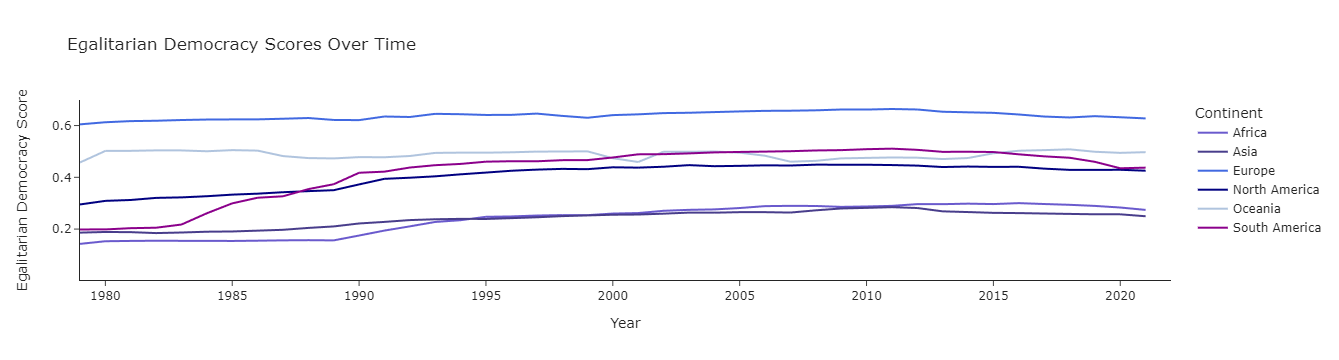

'https://plotly.com/~jcraciun/5/'

In [40]:
egalitarian_democracy_continent = px.line(grouped_vdem, x = 'year', y = 'v2x_egaldem', color = 'Continent',
                             title = "Egalitarian Democracy Scores Over Time", 
                             color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                             labels = {
                                 'v2x_egaldem': "Egalitarian Democracy Score",
                                 'year': 'Year'
                             },
                             template = 'simple_white')

egalitarian_democracy_continent.update_xaxes(range = [1979, 2022])

egalitarian_democracy_continent.show()

# export for Medium article 
py.plot(egalitarian_democracy_continent, filename="Average Egalitarian Democracy Scores Over Time", auto_open = True)

### Graph Updated Dataset with 2021 Values

In [37]:
# grouping the dataset first
grouped_vdem_update = updated_vdem.groupby(['Continent', 'year']).agg({'v2x_egaldem': ['mean']})
grouped_vdem_update.columns = ['v2x_egaldem']
grouped_vdem_update = grouped_vdem_update.reset_index()
grouped_vdem_update.info()
grouped_vdem_update.head(233)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1398 entries, 0 to 1397
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Continent    1398 non-null   object 
 1   year         1398 non-null   int64  
 2   v2x_egaldem  732 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 32.9+ KB


,Continent,year,v2x_egaldem
0,Africa,1789,NaN
1,Africa,1790,NaN
2,Africa,1791,NaN
3,Africa,1792,NaN
4,Africa,1793,NaN
...,...,...,...
228,Africa,2017,0.296843
229,Africa,2018,0.293765
230,Africa,2019,0.289510
231,Africa,2020,0.283314


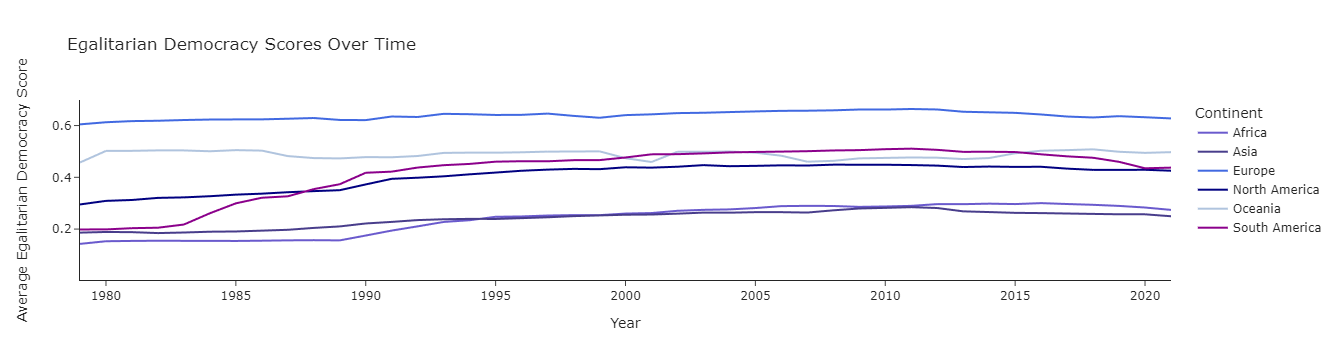

In [38]:
egalitarian_democracy_continent_updated = px.line(grouped_vdem_update, x = 'year', y = 'v2x_egaldem', color = 'Continent',
                             title = "Egalitarian Democracy Scores Over Time", 
                             color_discrete_sequence = ['slateblue', 'darkslateblue', 'royalblue', 'navy', 'lightsteelblue', 'darkmagenta'],
                             labels = {
                                 'v2x_egaldem': "Average Egalitarian Democracy Score",
                                 'year': 'Year'
                             },
                             template = 'simple_white')

egalitarian_democracy_continent_updated.update_xaxes(range = [1979, 2021])

egalitarian_democracy_continent_updated.show()

In [41]:
# find global averages for the TimeSeries portion of this project
updated_vdem_continent = updated_vdem.groupby('historical_date').agg({'v2x_egaldem': ['mean']})

In [42]:
# find global averages for the TimeSeries portion of this project
updated_vdem_continent.columns = ['v2x_egaldem']
updated_vdem_continent = updated_vdem_continent.reset_index()
updated_vdem_continent

,historical_date,v2x_egaldem
0,1789-12-31,NaN
1,1790-12-31,NaN
2,1791-12-31,NaN
3,1792-12-31,NaN
4,1793-12-31,NaN
...,...,...
228,2017-12-31,0.404095
229,2018-12-31,0.401189
230,2019-12-31,0.399308
231,2020-12-31,0.394515


In [142]:
updated_vdem_continent.to_csv('cont_col_2021', index=False)

## Plotly Initialization

In [24]:
import chart_studio 
username='jcraciun'
api_key='XWBtgsz2PEVppwjbnrKJ'

chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls